In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\FX517ZM\Desktop\Data Science\Lesson-25 Final Exam Data\Life Expectancy Data.csv')
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [3]:
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [4]:
data=pd.get_dummies(data, prefix=['status'], columns=['Status'], drop_first=True)

In [5]:
result=data.dtypes
result

Country                             object
Year                                 int64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
status_Developing                     bool
dtype: object

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
status_Developing                    0
dtype: int64

In [8]:
for i in data[['Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling','Life expectancy ']]:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [9]:
data.iloc[:,1:].corr()['Life expectancy ']

Year                               0.169623
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
status_Developing                 -0.481962
Name: Life expectancy , dtype: float64

In [10]:
corr = data.iloc[:,1:].corr()['Life expectancy ']
search = corr[abs(corr) > 0.5].index.tolist()
search

['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling',
 'Life expectancy ']

In [11]:
data = data[['Country','Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling',
 'Life expectancy ']]

data

,Country,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,263.0,19.1,0.1,0.479,10.1,65.0
1,Afghanistan,271.0,18.6,0.1,0.476,10.0,59.9
2,Afghanistan,268.0,18.1,0.1,0.470,9.9,59.9
3,Afghanistan,272.0,17.6,0.1,0.463,9.8,59.5
4,Afghanistan,275.0,17.2,0.1,0.454,9.5,59.2
...,...,...,...,...,...,...,...
2933,Zimbabwe,723.0,27.1,33.6,0.407,9.2,44.3
2934,Zimbabwe,715.0,26.7,36.7,0.418,9.5,44.5
2935,Zimbabwe,73.0,26.3,39.8,0.427,10.0,44.8
2936,Zimbabwe,686.0,25.9,42.1,0.427,9.8,45.3


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 #'Income composition of resources',
 #'Schooling'
                 ]]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.330300,Adult Mortality
1,1.661569,BMI
2,1.533587,HIV/AIDS


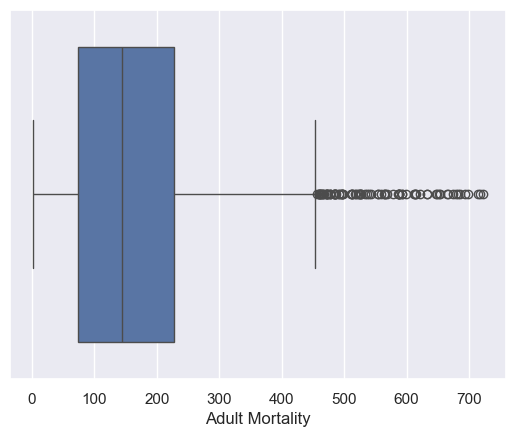

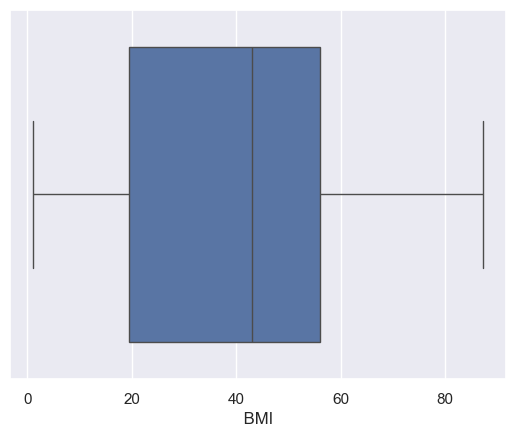

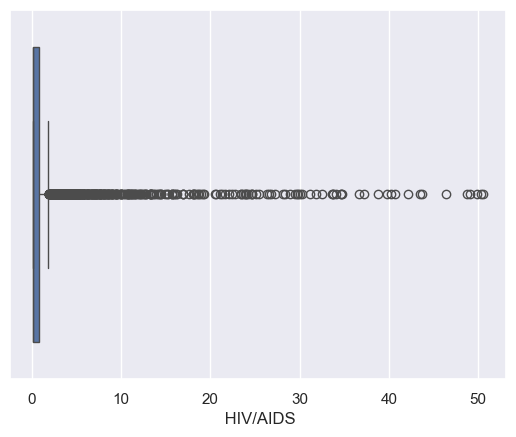

In [13]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',]]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [14]:
q1=data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS']].quantile(0.25)
q3=data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling']].quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [15]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

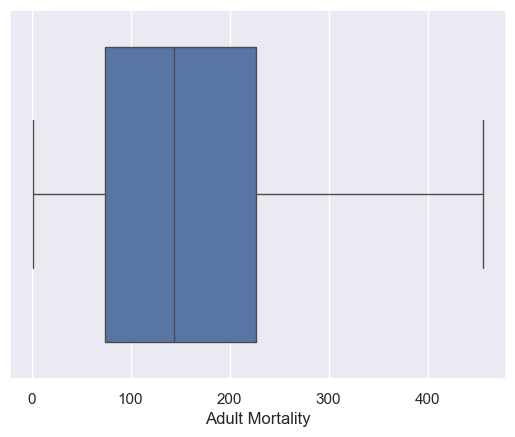

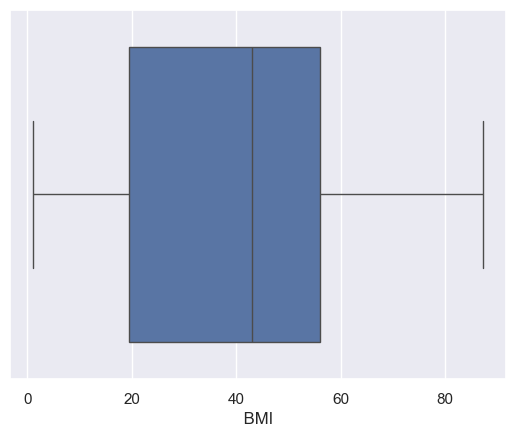

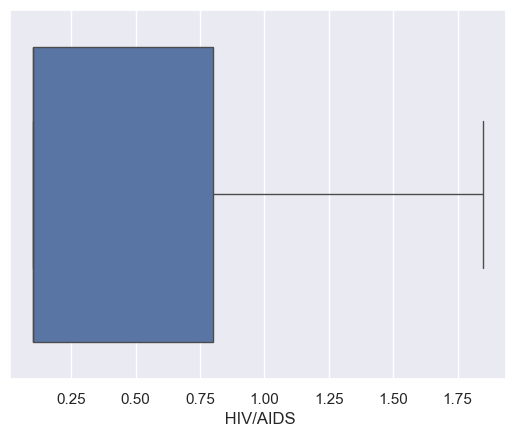

In [16]:
for i in data[['Adult Mortality',
 ' BMI ',
 ' HIV/AIDS']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [17]:
data = data[['Country','Adult Mortality',' BMI ',' HIV/AIDS','Life expectancy ']]

In [18]:
y = data['Life expectancy ']
x1 = data.drop(['Country','Life expectancy '],axis=1)

In [19]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:13:39   Log-Likelihood:                -8857.6
No. Observations:                2938   AIC:                         1.772e+04
Df Residuals:                    2934   BIC:                         1.775e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              73.6262      0.301    244.470      0.000      73.036      74.217
Adult Mortality    -0.0248      0.001    -24.877      0.000      -0.027      -0.023
 BMI                0.0905      0.005     17.185      0.000       0.080       0.101
 HIV/AIDS          -7.1695      0.174    -41.125      0.000      -7.511      -6.828
==============================================================================
Omnibus:                       56.740   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.324
Skew:                          -0.173   Prob(JB):                     8.96e-21
Kurtosis:                       3.797   Cond. No.                         675.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
targets = data['Life expectancy ']
inputs = data.drop(['Country','Life expectancy '],axis=1)

inputs

,Adult Mortality,BMI,HIV/AIDS
0,263.0,19.1,0.10
1,271.0,18.6,0.10
2,268.0,18.1,0.10
3,272.0,17.6,0.10
4,275.0,17.2,0.10
...,...,...,...
2933,456.5,27.1,1.85
2934,456.5,26.7,1.85
2935,73.0,26.3,1.85
2936,456.5,25.9,1.85


In [21]:
# rangeler ferqlenir diyene Scale edirik
from sklearn.preprocessing import StandardScaler
# Standart (avg,st_dev)
# Normal (min,max)
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [22]:
inputs_scaled = scaler.transform(inputs)

inputs_scaled

array([[ 0.87452096, -0.9647145 , -0.62920933],
       [ 0.94380652, -0.98980951, -0.62920933],
       [ 0.91782444, -1.01490451, -0.62920933],
       ...,
       [-0.77101101, -0.60334645,  1.89504141],
       [ 2.55036537, -0.62342245,  1.89504141],
       [ 2.55036537, -0.64349846,  1.89504141]])

In [23]:
data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,Adult Mortality,BMI,HIV/AIDS
0,0.874521,-0.964715,-0.629209
1,0.943807,-0.989810,-0.629209
2,0.917824,-1.014905,-0.629209
3,0.952467,-1.040000,-0.629209
4,0.978449,-1.060076,-0.629209
...,...,...,...
2933,2.550365,-0.563194,1.895041
2934,2.550365,-0.583270,1.895041
2935,-0.771011,-0.603346,1.895041
2936,2.550365,-0.623422,1.895041


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=365)

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
from sklearn.linear_model import LinearRegression

def evaluate(X_test, y_test):

    models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(n_estimators = 100, random_state = 42),SVR(),
             CatBoostRegressor(),XGBRegressor(),LGBMRegressor()]

    for model in models:

        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test) 
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        y_pred_train = model.predict(X_train)

        mse_train = mean_squared_error(y_train, y_pred_train) 
        mae_train = mean_absolute_error(y_train, y_pred_train) 
        rmse_train = np.sqrt(mse_train)  
        r2_train = r2_score(y_train, y_pred_train)

        pd.options.display.float_format = '{:.2f}'.format


        result={
            'metric':['mae','mse','rmse','r2'],
            'train':[mae_train,mse_train,rmse_train,r2_train*100],
            'test':[mae_test,mse_test,rmse_test,r2_test*100]}

        results= pd.DataFrame(result)


    
        print(results,model)        

In [32]:
evaluate(X_test, y_test)

  metric  train  test
0    mae   3.77  3.70
1    mse  24.46 23.89
2   rmse   4.95  4.89
3     r2  73.69 69.84 LinearRegression()
  metric  train  test
0    mae   0.04  2.16
1    mse   0.13 10.64
2   rmse   0.37  3.26
3     r2  99.86 86.57 DecisionTreeRegressor()
  metric  train  test
0    mae   0.70  1.82
1    mse   1.07  6.88
2   rmse   1.03  2.62
3     r2  98.85 91.31 RandomForestRegressor(random_state=42)
  metric  train  test
0    mae   2.58  2.49
1    mse  12.56 12.56
2   rmse   3.54  3.54
3     r2  86.49 84.15 SVR()
Learning rate set to 0.046861
0:	learn: 9.3082244	total: 137ms	remaining: 2m 16s
1:	learn: 8.9719819	total: 138ms	remaining: 1m 9s
2:	learn: 8.6550866	total: 140ms	remaining: 46.5s
3:	learn: 8.3476905	total: 141ms	remaining: 35.2s
4:	learn: 8.0767159	total: 143ms	remaining: 28.4s
5:	learn: 7.8150057	total: 144ms	remaining: 23.9s
6:	learn: 7.5744129	total: 145ms	remaining: 20.6s
7:	learn: 7.3301911	total: 147ms	remaining: 18.2s
8:	learn: 7.1027168	total: 148ms	remainin

In [33]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [35]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
91 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklea

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [36]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [38]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = reg.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [39]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

  Metric  Train  Test
0    MAE   0.70  1.87
1    MSE   1.07  6.94
2   RMSE   1.03  2.63
3     R2  98.85 91.24


In [40]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    reg.fit(X_train_single_var, y_train)
    y_pred_train_single_var = reg.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = reg.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
0,Adult Mortality,0.8394,0.7949
2,HIV/AIDS,0.6644,0.5938
1,BMI,0.6580,0.4633


In [41]:
#BMI sutununu overfitting hesab etmek olar novbeti emeliyyatlari yerine yetiririk eks halda bele saxlayiriq

In [42]:
inputs = data_scaled[['Adult Mortality',' HIV/AIDS',]]
targets = data['Life expectancy ']

In [43]:
inputs

,Adult Mortality,HIV/AIDS
0,0.8745,-0.6292
1,0.9438,-0.6292
2,0.9178,-0.6292
3,0.9525,-0.6292
4,0.9784,-0.6292
...,...,...
2933,2.5504,1.8950
2934,2.5504,1.8950
2935,-0.7710,1.8950
2936,2.5504,1.8950


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [45]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
result = evaluate(reg, X_test, y_test)

  Metric   Train    Test
0    MAE  1.6619  2.3582
1    MSE  5.2036 10.1123
2   RMSE  2.2811  3.1800
3     R2 94.4014 87.2336


En yaxsi model RandomForestRegressor(n_estimators = 100, random_state = 42) modeli 